# Wordcount using Kafka

![](https://camo.githubusercontent.com/56166d361c3975dee750ecce16d605bbbf66516b/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f352f35332f4170616368655f6b61666b615f776f7264747970652e737667)

In [2]:
from confluent_kafka import Producer, Consumer
from confluent_kafka import SerializingProducer, DeserializingConsumer
from confluent_kafka.serialization import StringSerializer, StringDeserializer
from confluent_kafka.admin import AdminClient, NewTopic
from uuid import uuid4
import sys, lorem

brokers = "kafka1:9092,kafka2:9093"
topics = ["sentences", "words"]

In [4]:
new_topics = [NewTopic(topic, num_partitions=2, replication_factor=1) for topic in topics]

In [5]:
fs = a = AdminClient({'bootstrap.servers': brokers}).create_topics(new_topics)

## Producing Sentences

Non amet porro labore neque.
Amet adipisci dolore amet aliquam amet consectetur.
Neque ut neque porro non.
Quiquia dolore magnam eius.
Dolorem quiquia etincidunt magnam non.
Modi quiquia neque adipisci.
Ipsum modi ut neque.
Velit est velit est neque quiquia.
Neque dolorem velit amet quisquam quisquam.
Tempora etincidunt non quiquia magnam dolor dolore.
Sed amet dolore ipsum voluptatem.
Est neque quaerat aliquam eius.

In [7]:
pconf = {
    'bootstrap.servers':brokers,
    'key.serializer': StringSerializer('utf_8'),
    'value.serializer': StringSerializer('utf_8')
}

In [8]:
p = SerializingProducer(pconf)

In [9]:
for n in range(1,100):
    try:
        # Produce line (without newline)
        line = lorem.sentence()
        p.produce(topics[0], key=str(uuid4()), value=line)
        p.poll(0)
        p.flush()
        print(line)
    except BufferError:
        sys.stderr.write('%% Local producer queue is full (%d messages awaiting delivery): try again\n' % len(p))

Aliquam quisquam dolor dolor velit.
Neque dolor sit ut adipisci modi.
Eius voluptatem sed dolore.
Sed eius eius adipisci est.
Amet velit neque velit non quisquam tempora.
Consectetur ipsum neque quisquam labore porro.
Quisquam ut magnam aliquam aliquam modi voluptatem.
Numquam sed ipsum porro numquam velit adipisci dolor.
Amet eius dolor aliquam.
Tempora adipisci magnam consectetur neque.
Eius porro ipsum sit consectetur sit tempora voluptatem.
Porro dolor adipisci modi porro dolor dolor ut.
Amet adipisci sit numquam quiquia modi.
Sit quiquia magnam adipisci dolor.
Voluptatem quisquam neque velit velit numquam quiquia.
Magnam aliquam eius sed aliquam quiquia.
Ut ipsum dolorem non non neque sit.
Dolorem amet voluptatem aliquam.
Voluptatem dolorem magnam velit quisquam neque dolor ut.
Adipisci non adipisci modi.
Dolorem sed dolore numquam porro.
Eius quaerat dolore voluptatem dolorem sit.
Consectetur voluptatem modi non aliquam ut non.
Aliquam quisquam porro modi etincidunt sit voluptate

## Consuming Sentences

In [10]:
string_deserializer = StringDeserializer('utf_8')

In [11]:
consumer_conf = {
    'bootstrap.servers': brokers,
    'key.deserializer': string_deserializer,
    'value.deserializer': string_deserializer,
    'group.id': str(uuid4()),
    'session.timeout.ms': 6000,
    'auto.offset.reset': 'earliest'}

In [12]:
c = DeserializingConsumer(consumer_conf)
c.subscribe([topics[0]])

In [13]:
try:
    while True:
        # SIGINT can't be handled when polling, limit timeout to 1 second.
        msg = c.poll(1.0)
        if msg is None:
            continue
        if msg.error():
            raise KafkaException(msg.error())
        else:
            print("{} [{}] at offset  {} with key  {}:  {}".format(msg.topic(), msg.partition(), msg.offset(), str(msg.key()), str(msg.value())))
except KeyboardInterrupt:
    sys.stderr.write('%% Aborted by user\n')
finally:
    # Close down consumer to commit final offsets.
    c.close()

sentences [0] at offset  0 with key  43c1f35a-77aa-48ec-b95b-7406fa03b766:  Aliquam quisquam dolor dolor velit.
sentences [0] at offset  1 with key  40a135aa-7fe9-4ce5-a796-7ef588ce8518:  Neque dolor sit ut adipisci modi.
sentences [0] at offset  2 with key  180abdce-9f14-416f-9b16-dedab8ab235a:  Eius voluptatem sed dolore.
sentences [0] at offset  3 with key  0786f0ff-6cbd-4382-b6a9-51811315ed13:  Sed eius eius adipisci est.
sentences [0] at offset  4 with key  abfd1073-15da-4d1d-8911-e023545a9005:  Amet velit neque velit non quisquam tempora.
sentences [0] at offset  5 with key  09d96acc-e3e9-4750-a86e-51df661ecafa:  Consectetur ipsum neque quisquam labore porro.
sentences [0] at offset  6 with key  bf9f60d7-067e-48d6-9931-cf960574ce62:  Quisquam ut magnam aliquam aliquam modi voluptatem.
sentences [0] at offset  7 with key  858f2258-0be9-4ad8-8852-9e240a495c5f:  Numquam sed ipsum porro numquam velit adipisci dolor.
sentences [0] at offset  8 with key  4f0370e1-b2bb-4b9a-aa3f-649b93a

%% Aborted by user


## Consuming Sentences and Producing Words

In [15]:
consumer_conf['group.id'] = str(uuid4())
c2 = DeserializingConsumer(consumer_conf)
c2.subscribe([topics[0]])
p2 = SerializingProducer(pconf)

In [16]:
try:
    while True:
        # SIGINT can't be handled when polling, limit timeout to 1 second.
        msg = c2.poll(1.0)
        if msg is None:
            continue
        if msg.error():
            raise KafkaException(msg.error())
        else:
            for w in msg.value().split(" "):
                print(w)
                p2.produce(topics[1], key=msg.key(), value=w)
                p2.poll(0)
                p2.flush()
except KeyboardInterrupt:
    sys.stderr.write('%% Aborted by user\n')
finally:
    # Close down consumer to commit final offsets.
    c2.close()

Aliquam
quisquam
dolor
dolor
velit.
Neque
dolor
sit
ut
adipisci
modi.
Eius
voluptatem
sed
dolore.
Sed
eius
eius
adipisci
est.
Amet
velit
neque
velit
non
quisquam
tempora.
Consectetur
ipsum
neque
quisquam
labore
porro.
Quisquam
ut
magnam
aliquam
aliquam
modi
voluptatem.
Numquam
sed
ipsum
porro
numquam
velit
adipisci
dolor.
Amet
eius
dolor
aliquam.
Tempora
adipisci
magnam
consectetur
neque.
Eius
porro
ipsum
sit
consectetur
sit
tempora
voluptatem.
Porro
dolor
adipisci
modi
porro
dolor
dolor
ut.
Amet
adipisci
sit
numquam
quiquia
modi.
Sit
quiquia
magnam
adipisci
dolor.
Voluptatem
quisquam
neque
velit
velit
numquam
quiquia.
Magnam
aliquam
eius
sed
aliquam
quiquia.
Ut
ipsum
dolorem
non
non
neque
sit.
Dolorem
amet
voluptatem
aliquam.
Voluptatem
dolorem
magnam
velit
quisquam
neque
dolor
ut.
Adipisci
non
adipisci
modi.
Dolorem
sed
dolore
numquam
porro.
Eius
quaerat
dolore
voluptatem
dolorem
sit.
Consectetur
voluptatem
modi
non
aliquam
ut
non.
Aliquam
quisquam
porro
modi
etincidunt
sit
voluptate

%% Aborted by user


## Counting Words

In [17]:
consumer_conf['group.id'] = str(uuid4())
words = {}

In [18]:
c3 = DeserializingConsumer(consumer_conf)
c3.subscribe([topics[1]])

In [19]:
try:
    while True:
        # SIGINT can't be handled when polling, limit timeout to 1 second.
        msg = c3.poll(1.0)
        if msg is None:
            continue
        if msg.error():
            raise KafkaException(msg.error())
        else:
            w = str(msg.value())
            if w in words:
                words[w] = words[w]+1
            else:
                words[w] = 0
except KeyboardInterrupt:
    sys.stderr.write('%% Aborted by user\n')
finally:
    # Close down consumer to commit final offsets.
    c3.close()

%% Aborted by user


In [20]:
words

{'Aliquam': 5,
 'quisquam': 15,
 'dolor': 17,
 'velit.': 1,
 'Neque': 3,
 'sit': 19,
 'ut': 10,
 'adipisci': 18,
 'modi.': 4,
 'Eius': 3,
 'voluptatem': 15,
 'sed': 17,
 'dolore.': 1,
 'Sed': 3,
 'eius': 9,
 'est.': 5,
 'Amet': 6,
 'velit': 14,
 'neque': 16,
 'non': 11,
 'tempora.': 2,
 'Consectetur': 3,
 'ipsum': 11,
 'labore': 12,
 'porro.': 3,
 'Quisquam': 3,
 'magnam': 12,
 'aliquam': 13,
 'modi': 10,
 'voluptatem.': 6,
 'Numquam': 3,
 'porro': 15,
 'numquam': 15,
 'dolor.': 3,
 'aliquam.': 6,
 'Tempora': 4,
 'consectetur': 8,
 'neque.': 3,
 'tempora': 17,
 'Porro': 1,
 'ut.': 2,
 'quiquia': 17,
 'Sit': 3,
 'Voluptatem': 2,
 'quiquia.': 5,
 'Magnam': 6,
 'Ut': 1,
 'dolorem': 14,
 'sit.': 2,
 'Dolorem': 5,
 'amet': 5,
 'Adipisci': 3,
 'dolore': 10,
 'quaerat': 8,
 'non.': 0,
 'etincidunt': 12,
 'sed.': 4,
 'Ipsum': 3,
 'ipsum.': 2,
 'Modi': 2,
 'Est': 4,
 'Dolore': 0,
 'consectetur.': 4,
 'Labore': 2,
 'est': 6,
 'labore.': 0,
 'eius.': 4,
 'magnam.': 2,
 'Non': 0,
 'Etincidunt': 3,

In [21]:
import numpy as np
import matplotlib.pyplot as plt


<BarContainer object of 78 artists>

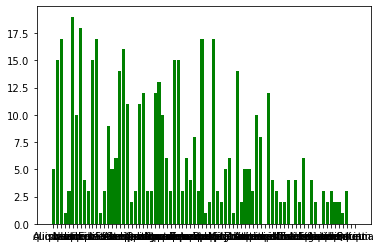

In [22]:
plt.bar(words.keys(), words.values(), color='g')